In [1]:
# In this notebook we load the trained model and use it to predict on some sample test images

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.preprocessing import image
#from keras.preprocessing.image import ImageDataGenerator
#from keras.models import Sequential
#from keras.layers import Conv2D, MaxPooling2D
#from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras.models import load_model

import warnings
warnings.filterwarnings('ignore', category = DeprecationWarning)

Using TensorFlow backend.


In [2]:
img_width=224
img_height=224

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [3]:
# Loading the custom trained ConvNet model

from keras.models import load_model
 
# load model
#full_model = load_model('full_model.h5')
vgg_binary = load_model('vgg_binary.h5')

# summarize model.
#full_model.summary()
vgg_binary.summary()

W0830 16:42:52.421021 20448 deprecation_wrapper.py:119] From C:\Users\atuls\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:529: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0830 16:42:52.433869 20448 deprecation_wrapper.py:119] From C:\Users\atuls\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4420: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0830 16:42:52.453766 20448 deprecation_wrapper.py:119] From C:\Users\atuls\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4255: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0830 16:42:52.922606 20448 deprecation_wrapper.py:119] From C:\Users\atuls\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:178: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0830 16:42:52.923655 20448 deprecation_wrapper.py:119] From C:\Users\atul

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [4]:
# Importing modules for loading, transforming and displaying images

from IPython.display import display
from PIL import Image
import os

In [5]:
img_dir = 'data/test/'

img_paths = []
for imgs in os.listdir(img_dir):
    img_paths.append(img_dir+imgs)

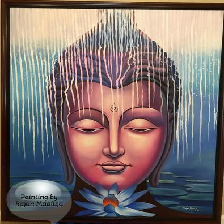

Buddha



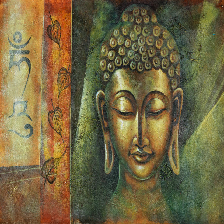

Buddha



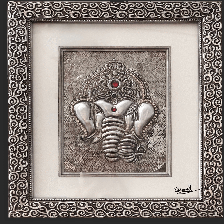

Ganesha



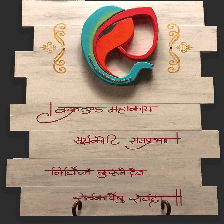

Ganesha



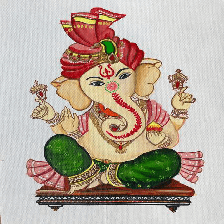

Ganesha



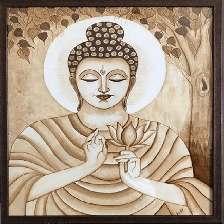

Ganesha



In [6]:
# Testing the custom trained ConvNet model and the VGG16 model to predict the classes if images in the test set.
# Note: The model has not seen these images before
# Custom ConvNet: given the model accuracy was ~75%, it does not do a perfect job of classifying the test images
# VGG16 (Modified): the model does a much better job (only 1 misclassificationvout of 20: testing accuracy: 95%) 
# than the simple ConvNet that I built and trained.

for img in img_paths:
    img = image.load_img(img, target_size=(img_width, img_height))
    display(img)
    
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    #result = full_model.predict(img)
    result = vgg_binary.predict(img)
    if result[0][0] > 0.5:
        prediction = 'Ganesha'
    else:
        prediction = 'Buddha'
        
    print(prediction)
    print()